In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Phase_Retrieval/classification_over_measurements/utils")

Mounted at /content/gdrive


In [ ]:
from LoadData import get_datos
from FinalModel import CLASSIFICATION_MODEL,CLASSIFICATION_MODEL_with_back,CLASSIFICATION_MODEL_with_initialization
from FinalModel import ejemplo_backpropagation, ejemplo_inicializacion
import tensorflow as tf
import matplotlib.pyplot as plt
from CallBacks import callback_test_clasification
#$from loss_and_metrics import F1_score

In [ ]:
#@title Parámetros
SHAPE = (128,128)
BATCH_SIZE = 8
NUM_MEASUREMENTS = 1
NUM_CLASSES = 10

dataset = "mnist" # mnist - fashion_mnist - cifar10
initialization = "FSI" # None - backpropagation - FSI

In [ ]:
results_folder = os.path.join("..", "results", dataset)
if not os.path.exists(results_folder):
  os.mkdir(results_folder)
results_folder = os.path.join(results_folder, initialization)
if not os.path.exists(results_folder):
  print("Creado")
  os.mkdir(results_folder)

In [ ]:
results_folder

'../results/mnist/FSI'

In [ ]:
train_images, test_images = get_datos(name_dataset = dataset, batch_size=BATCH_SIZE, tam = SHAPE, num_clases=NUM_CLASSES)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
x_train,y_train = next(iter(train_images))

In [ ]:
back_propagation = ejemplo_backpropagation(shape=SHAPE, L = NUM_MEASUREMENTS,  archivo_sftf_solver = "SFTF_solver_LAB_simul.mat", snr=100)
inicializacion = ejemplo_inicializacion(shape=SHAPE, L = NUM_MEASUREMENTS, archivo_sftf = "SFTF_LAB_simul.mat",  archivo_sftf_solver = "SFTF_solver_LAB_simul.mat", snr=100)
back_propagation.build((BATCH_SIZE, *SHAPE, 2))
inicializacion.build((BATCH_SIZE, *SHAPE, 2))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [ ]:
output = back_propagation(x_train)
muestras_back, back_real, back_imag, back_abs, back_ang = tf.unstack(output, num=5, axis=-1)
output = inicializacion(x_train)
muestras_init, init_real, init_imag, init_abs, init_ang = tf.unstack(output, num=5, axis=-1)

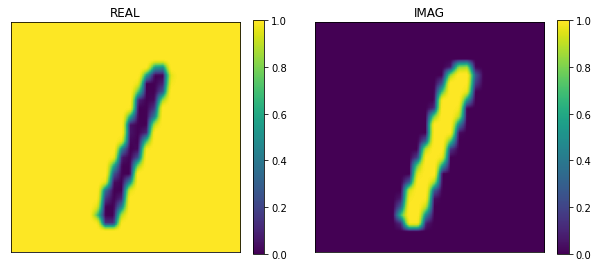

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(x_train[1,...,0]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("REAL")
a = axs[1].imshow(x_train[1,...,1]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("IMAG")
fig.show()

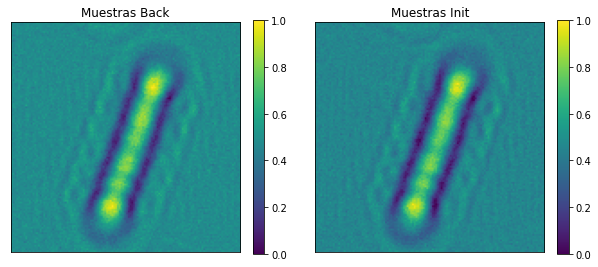

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(muestras_back[1,...]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("Muestras Back")
a = axs[1].imshow(muestras_init[1,...]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("Muestras Init")
fig.show()

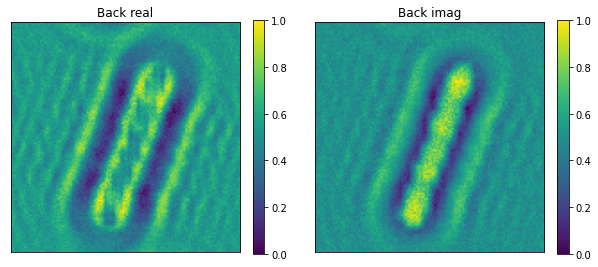

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(back_real[1,...]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("Back real")
a = axs[1].imshow(back_imag[1,...]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("Back imag")
fig.show()

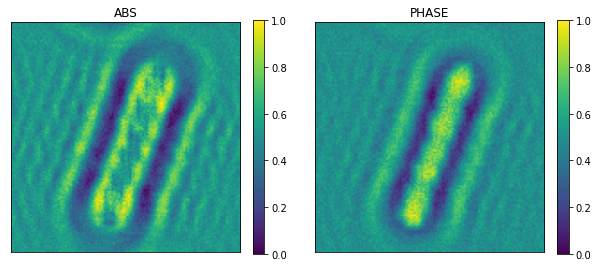

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(back_abs[1,]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("ABS")
a = axs[1].imshow(back_ang[1,]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("PHASE")
fig.show()

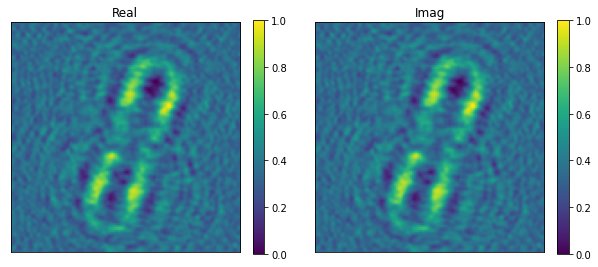

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(init_real[1,]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("Real")
a = axs[1].imshow(init_real[1,]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("Imag")
fig.show()

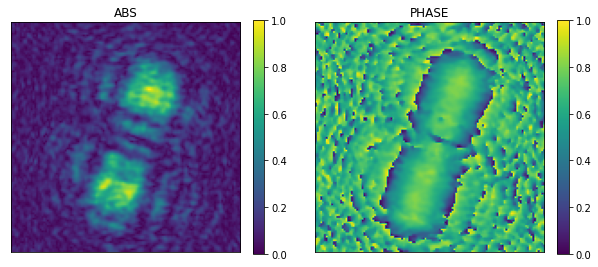

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(init_abs[1,]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("ABS")
a = axs[1].imshow(init_ang[1,]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("PHASE")
fig.show()

In [ ]:
if initialization == "None":
  modelo = CLASSIFICATION_MODEL(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS, snr=100)
elif initialization == "backpropagation":
  modelo = CLASSIFICATION_MODEL_with_back(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS, snr=100)
elif initialization == "FSI":
  modelo = CLASSIFICATION_MODEL_with_initialization(shape=SHAPE, num_clases=NUM_CLASSES, L = NUM_MEASUREMENTS, snr=100)
else: 
  raise Exception("INICIALIZACIÓN INCORRECTA: " + initialization)

modelo.build((BATCH_SIZE, *SHAPE, 2))

In [ ]:
#train_images = train_images.take(30)
modelo.summary()

Model: "classification_model_with_initialization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
make_inicializacion_1 (make_ multiple                  0         
_________________________________________________________________
Muestreo (Muestreo)          multiple                  0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 10)                2270794   
_________________________________________________________________
ConvInitial (Conv2D)         multiple                  138       
_________________________________________________________________
Gaussian_noise_layer (custom multiple                  0         
Total params: 2,270,932
Trainable params: 2,236,820
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
num_epochs = 30
chekpoint = tf.keras.callbacks.ModelCheckpoint(os.path.join(results_folder, "last_weights.h5"), save_weights_only=True)
callback = callback_test_clasification(results_folder = results_folder, generator = test_images, num_epochs=num_epochs)
opti = tf.keras.optimizers.Adam(amsgrad=True, learning_rate=1e-4)
#modelo.load_weights(os.path.join(results_folder, "last_weights.h5"))
modelo.save_weights(os.path.join(results_folder, "initial_weights.h5"))
#modelo.compile(optimizer=opti, loss = "binary_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy"), tf.keras.metrics.Recall(name = "recall_1"), tf.keras.metrics.Precision(name = "precision_1")])
modelo.compile(optimizer=opti, loss = "categorical_crossentropy", metrics=[tf.keras.metrics.BinaryAccuracy(name="binary_accuracy"), tf.keras.metrics.Recall(name = "recall_1"), tf.keras.metrics.Precision(name = "precision_1")])
history = modelo.fit(train_images, epochs=num_epochs,validation_data=test_images, callbacks=[chekpoint, callback])

Epoch 1/30
7500/7500 [==============================] - 555s 73ms/step - loss: 0.0919 - binary_accuracy: 0.9700 - recall_1: 0.7706 - precision_1: 0.9161 - val_loss: 0.0381 - val_binary_accuracy: 0.9913 - val_recall_1: 0.9495 - val_precision_1: 0.9630
Epoch 2/30
7500/7500 [==============================] - 538s 72ms/step - loss: 0.0181 - binary_accuracy: 0.9945 - recall_1: 0.9706 - precision_1: 0.9744 - val_loss: 0.0093 - val_binary_accuracy: 0.9971 - val_recall_1: 0.9849 - val_precision_1: 0.9863
Epoch 3/30
7500/7500 [==============================] - 537s 72ms/step - loss: 0.0097 - binary_accuracy: 0.9973 - recall_1: 0.9858 - precision_1: 0.9873 - val_loss: 0.0076 - val_binary_accuracy: 0.9977 - val_recall_1: 0.9884 - val_precision_1: 0.9888
Epoch 4/30
7500/7500 [==============================] - 538s 72ms/step - loss: 0.0057 - binary_accuracy: 0.9985 - recall_1: 0.9923 - precision_1: 0.9930 - val_loss: 0.0072 - val_binary_accuracy: 0.9977 - val_recall_1: 0.9883 - val_precision_1: 0.9

In [ ]:
modelo.summary()

Model: "classification_model_with_initialization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
make_inicializacion_1 (make_ multiple                  0         
_________________________________________________________________
Muestreo (Muestreo)          multiple                  0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 10)                2270794   
_________________________________________________________________
ConvInitial (Conv2D)         multiple                  138       
_________________________________________________________________
Gaussian_noise_layer (custom multiple                  0         
Total params: 2,270,932
Trainable params: 2,236,820
Non-trainable params: 34,112
_________________________________________________________________
